# MTH 306X Project 2 Option 1: Celestial Navigation
## Steven Bennett, Breanna Dahn, Md Hossain, Jemy Chen


### Introduction:


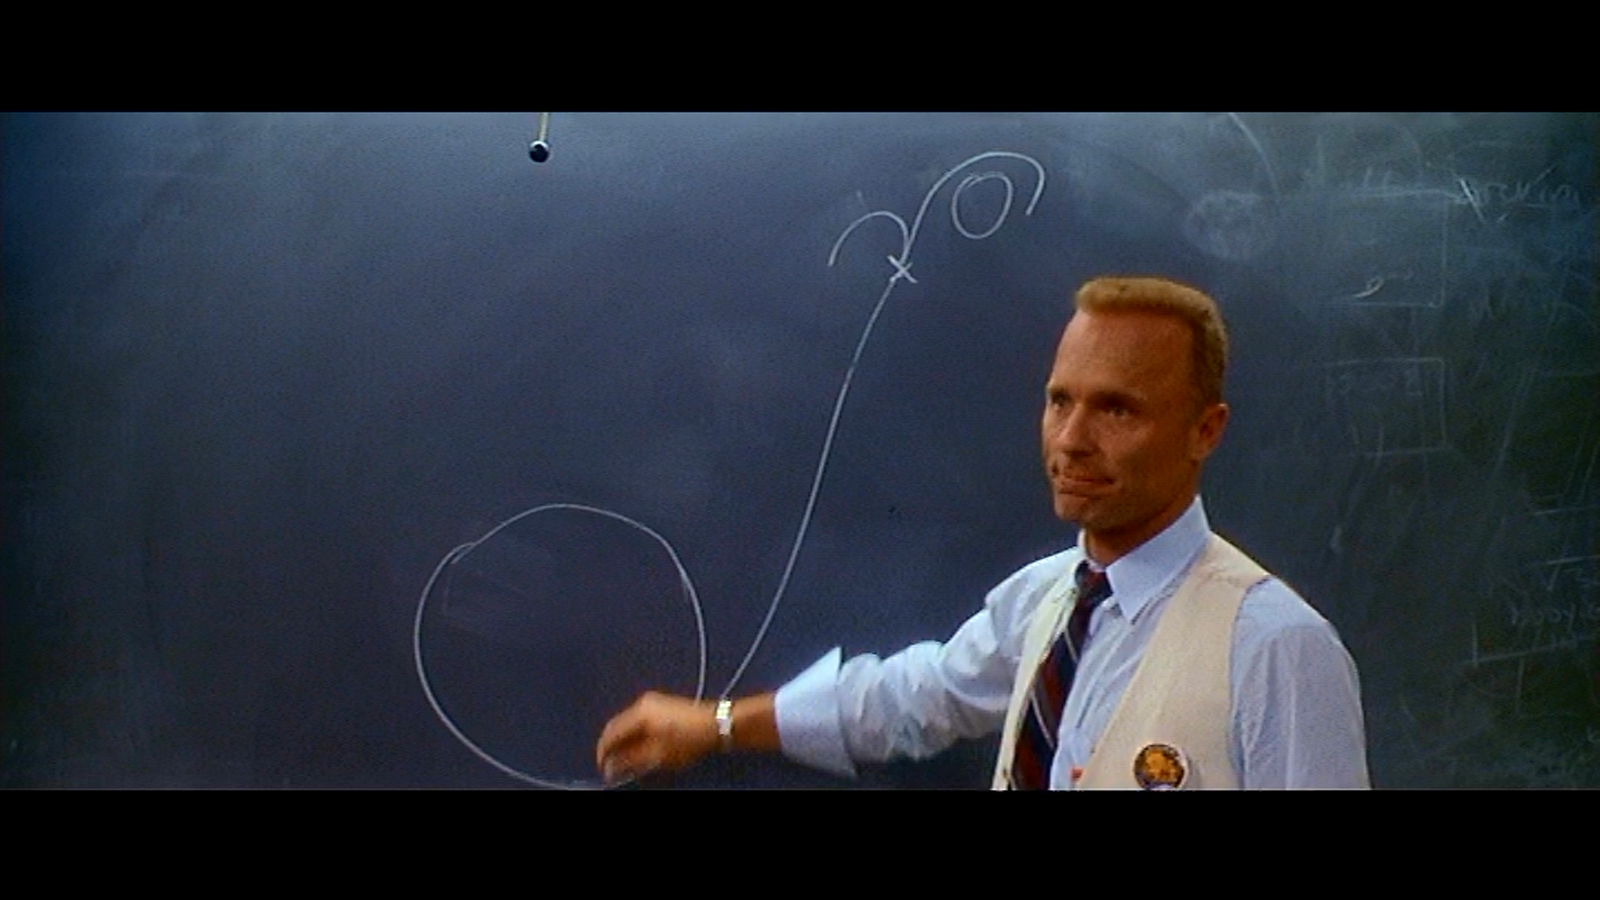

In [143]:
from IPython.display import Image
Image('apollo13.png')

Our project stems from the film Apollo 13. During the film a trajectory is drawn of a spacecraft leaving Earth, rounding the Moon, and coming back to Earth at a grazing angle. <br />
The overall path is a figure-8 trajectory and it is our task to prove, or disprove, that a trajectory like this exists. If a trajectory like this does exist, then we need to determine how fast the spacecraft must be going when it leaves Earth and the length of the spacecraft’s journey. <br />
We’ll be assessing this using the formulas given to us: 
$$\frac{d\vec{x}}{dt} = V \\ \frac{d\vec{V}}{dt} = \frac{F}{m}$$
$$F = \sum_{i=1}^{N} GM_im\frac{X_i − X}{| X_i-x |^3}$$
Using these formulas we will derive and split them up in such a way that we can easily get a qualitative model from a numerical solution method





### Derivation and Description of the Model:

We studied Newton’s 2nd Law which states $$\frac{d\vec{x}}{dt} = V \\ \frac{d\vec{V}}{dt} = \frac{F}{m}$$
Within these second order differential equations X is the spacecraft’s position vector, t represents time, V is the velocity vector, m is the mass of the spacecraft and F is the total force acting on the spacecraft. These equations represent the spacecraft’s motion at any point in time during its journey from the Earth, around the Moon, and then back to Earth in our particular model.   F is given to us by Newton’s Law of Gravitation stating $$F = \sum_{i=1}^{N} GM_im\frac{X_i − X}{| X_i-x |^3}$$ Within this equation N represents the number of bodies pulling on the spacecraft, namely Earth and the Moon in our situation, G is the universal gravitational constant, mi is the mass of the ith body, again the Earth and Moon, m is the mass of the spacecraft, and X is the position vector. This equations relates the force the spacecraft is experiencing to the source of the force, the large bodies of the Earth and Moon. The gravitational pull from the Earth and Moon will exert a force on the spacecraft and determine the path the spacecraft will go. 
To deeply understand the spacecraft’s position, velocity, and time it takes in each voyage, we’ll have to depend on conversion of our formulas. First by changing our second order differential equations into a first order differential equations.

We can do this by representing our $\vec{x}$ and $\vec{V}$ as their vector components
$$\frac{d\begin{bmatrix} x \\ y \end{bmatrix}}{dt} = \begin{bmatrix} u \\ v \end{bmatrix} \\ 
\frac{d\begin{bmatrix} u \\ v \end{bmatrix}}{dt} = \frac{F}{m}$$

We can then break down $\frac{F}{m}$ into the x and y components
$$ \frac{F}{m} = -GM_e\frac{\begin{bmatrix} X_i - x \\ Y_i - y \end{bmatrix}}{|\begin{bmatrix} X_i - x \\ Y_i - y \end{bmatrix}|^3}$$
For our model with the Earth placed at $(0,0)$ and the moon at a position in the same plane and at its orbital distance from the Earth in the x direction. <br />
F's x component can be modeled by

$$\frac{F_x}{m} = -GM_e\frac{x}{| D_e |^3} + GM_m\frac{d-x}{| D_m |^3}$$

and it's y component by
$$\frac{F_y}{m} = -GM_e\frac{y}{| D_e |^3} - GM_m\frac{y}{| D_m |^3}$$

where d is the orbital distance from Earth of the Moon, $D_e = \sqrt{x^2 + y^2}$, $D_m = \sqrt{(x-d)^2 + y^2}$, $M_e$ is the mass of the earth, and $M_m$ is the mass of the moon.

Therefore our original equations break down into the system of four components,


$$\frac{dx}{dt} = u$$

$$\frac{dy}{dt} = v$$

$$\frac{du}{dt} = -GM_e\frac{x}{| D_e |^3} + GM_m\frac{d-x}{| D_m |^3}$$

$$\frac{dv}{dt} = -GM_e\frac{y}{| D_e |^3} - GM_m\frac{y}{| D_m |^3}$$

These are now a system of equations that we know how to model and solve, at least numerically.

### Method of Solution:


Once we converted the two second order differential equations to first order, as seen below, we used Euler’s method to solve the differential equations and find the path of the spacecraft.

Euler's Method is a method of approximating a solution to  a first order system of equations at a given initial point. 

It works by taking the initial point and then incrementing it based on a chosen time step, the lower the time step the greater the accuracy. It then takes the new point and repeats the process over and over until it stops at the amount of times that the user specifies.

These new variable values are formed by the formulas,
$$ x_{i+1} = x_i + h*f(u_i,v_i) $$
$$ y_{i+1} = y_i + h*g(u_i,v_i) $$
$$ u_{i+1} = u_i + h*j(x_i,y_i) $$
$$ v_{i+1} = v_i + h*k(x_i,y_i) $$

You can see this in the code in the next section. It generates lists of all four of our variables at each time interval and then plots the x and y coordinates into a graph that models the path of our spacecraft.

### What the model predicts:


Using code for Euler's method for a system of differential equations we can plot our model to see if we get the Figure-8 shape we are looking for. 

We decided to choose the velocity based on given speed and a launch angle because that made getting the $u$ and $v$ components easier than choosing specific components.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


8.218055555555555 days


(-50000000.0, 400000000.0, -20000000.0, 40000000.0)

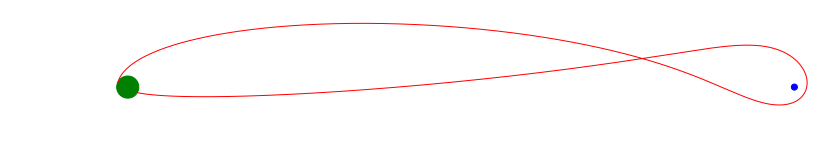

In [144]:
%pylab inline

#### Declaring all constants
radE = 6.371e6 # Radius of used in finding points on the earth
massE = 5.97e24 # Mass of the Earth
massM = 7.34767309e22 + (0.05*7.34767309e22) # This is the 5% greater mass of the moon
G = 6.673e-11 # Universal Gravitational Constant
distMtoE = 384000000


### Declaring things to change
theta = -pi/14.75 # Launch Angle
spd = 11.1345e3 # Launch Speed

### Declaring initial points
x = radE*cos(-pi/6)
y = radE*sin(-pi/6) # Launch Point (0,Re) but can we make this any point on the earth ? Rcos(),Rsin()
t = 0. # time
n = 40000 # Amount of Steps to take
h = 20 # Step Size
u = spd*cos(theta)  # Velocity Components based on speed and angle
v = spd*sin(theta)

### Making lists to store Euler's data

tList = [t]
xList = [x]
yList = [y]
uList = [u]
vList = [v]

### Setting up functions
def f(u,v): 
    return u
def g(u,v): 
    return v
def j(x,y):
    distFromEarth = sqrt(x**2 + y**2)
    distFromMoon = sqrt((x-distMtoE)**2 + y**2)
    return -G*massE*x/distFromEarth**3 + G*massM*(distMtoE-x)/distFromMoon**3
def k(x,y):
    distFromEarth = sqrt(x**2 + y**2)
    distFromMoon = sqrt((x-distMtoE)**2 + y**2)
    return -G*massE*y/distFromEarth**3 - G*massM*y/distFromMoon**3

### Performing Euler's Method
for i in range(n):
    #print(h*k(x,y))
    xx = x + h*f(u,v)
    yy = y + h*g(u,v)
    uu = u + h*j(x,y)
    vv = v + h*k(x,y)
    
    x = xx
    y = yy
    u = uu
    v = vv
    t = t + h
    
    tList.append(t)
    xList.append(x)
    yList.append(y)
    
    newdfe = sqrt(x**2+y**2)
    if newdfe < radE:
        break

    
### Plotting the graph
figure(figsize=(14,4))
subplot(111, aspect = 1)

print(str(t/3600/24) + " days")
plot(xList,yList, 'r-')
xlabel('t')
ylabel('y')


radM = 1737000
theta = linspace(0,2*pi,200)
fill((radE)*cos(theta), (radE)*sin(theta), color = 'g')
fill(distMtoE + (radM)*cos(theta), (radM)*sin(theta), color = 'b') 

axis("off")

In the example above, we found that choosing the launch angle of $\frac{\pi}{14.75}$ and a launch speed of $11.1345 * 10^3$ and using Euler's Method, we found that the model predicts that there is in fact a solution that exists that goes from Earth, takes a path in the shape of a Figure-8 around the moon, and back to the Earth at a grazing angle.

### Conclusions:


As you can see from the graph of our model we were able to successfully find a path from the Earth around the Moon that makes a Figure-8 shape and returns at a grazing angle <br /><br />
Throughout the process of completing this process, we learned how to take laws of Physics and modify them in order to model a physical process. In doing this we learned how to model a problem as a system of first order differential equations and then use Python to graphically represent a solution to said system of first order differential equations <br /><br />
Although this process was similar to that of a real world problem it did not have as many constraints as a real world problem we had. For example in the real world the moon would not be in a constant position for the 8 days our path would take, we would have to account for the movement of the moon. Also we wouldn't have free reign over what position on the Earth the spacecraft would take off from. We also would have to take into account the rotation of the Earth and the actual possible speed that the spacecraft could take off at. So although our model works for the situation described in the project requirements, it could be improved by taking in all of these real world factors and accounting for them. <br />